# **Big Data Analytics [CN7031] CRWK 2022-23**
# **Group ID: [111]**
# *Group Members* #
1.   Student 1: 
2.   Student 2: 
3.   Student 3: 
4.   Student 4: 

---


If you want to add comments on your group work, please write it here for us:

## Install Pyspark
##### Reference: https://spark.apache.org/docs/latest/api/python/getting_started/index.html

In [13]:
pip install pyspark

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local[*]").appName("Task1").getOrCreate()

23/03/05 00:57:47 WARN Utils: Your hostname, Kemboi resolves to a loopback address: 127.0.1.1; using 10.3.3.191 instead (on interface wlo1)
23/03/05 00:57:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/05 00:57:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/03/05 00:57:54 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Loading data

In [3]:
# Loading data from Local csv
df=spark.read.csv("data.csv")


In [4]:
df.show()

23/03/05 00:58:02 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+-------------

In [5]:
# Show the names of all columns in a DataFrame
print(df.columns)

['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', '_c9', '_c10', '_c11', '_c12', '_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', '_c25', '_c26', '_c27', '_c28', '_c29', '_c30', '_c31', '_c32', '_c33', '_c34', '_c35', '_c36', '_c37', '_c38', '_c39', '_c40', '_c41', '_c42', '_c43', '_c44', '_c45', '_c46', '_c47', '_c48', '_c49', '_c50', '_c51', '_c52', '_c53', '_c54', '_c55', '_c56', '_c57', '_c58', '_c59', '_c60', '_c61', '_c62', '_c63', '_c64', '_c65', '_c66', '_c67', '_c68', '_c69', '_c70', '_c71', '_c72', '_c73', '_c74', '_c75', '_c76', '_c77', '_c78', '_c79']


## Spark SQL Queries. 

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [9]:
# create a temporary SQL View
df.createOrReplaceTempView("my_table")
# load your data into a DataFrame
df = spark.read.format("csv").option("header", True).load("data.csv")

In [10]:
#Student One Querry 1
# select the values from column _c6 and count the number of occurrences of each value in the column. 
# group resultss by the values in column _c6 and sort in descending order by the count. 
# Return only 10 values with the highest count

result = spark.sql("SELECT _c6, COUNT(_c6) AS count_c6 FROM my_table GROUP BY _c6 ORDER BY count_c6 DESC LIMIT 10")

# display the result
result.show()

+----+--------+
| _c6|count_c6|
+----+--------+
|   0|  455846|
|1912|   30519|
|1928|   30093|
|1138|   24981|
|1148|   24772|
| 161|   21230|
|  97|   20958|
|  31|   17349|
|1944|   16465|
|  77|   14679|
+----+--------+



+--------+--------------------+
|Protocol|   Avg_Flow_Duration|
+--------+--------------------+
|       6|   9549803.667116841|
|      17|  376613.15135208116|
|       0|-1.21059038651405...|
|Protocol|                null|
+--------+--------------------+



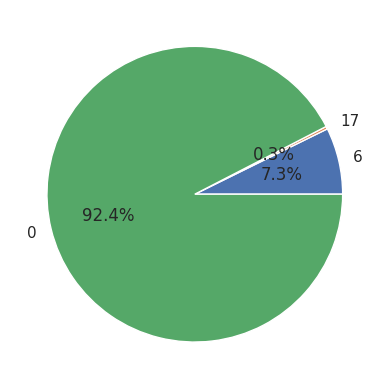

In [11]:
#Student One Querry 2
# select the _c1 column as Protocol and calculate the average value of the _c3 column as Avg_Flow_Duration.
# Group the results by Protocol, calculate the average of _c3 for each unique value of Protocol
# order the results by Avg_Flow_Duration in descending order
# limit the result to the top 10 rows with the highest Avg_Flow_Duration.

# run a SQL query against the view
result = spark.sql("SELECT my_table._c1 AS Protocol, AVG(my_table._c3) AS Avg_Flow_Duration FROM my_table GROUP BY Protocol ORDER BY Avg_Flow_Duration DESC LIMIT 10")

# display the result
result.show()


# plot the Avarage Flow duration in a pie chart
query1_pd = result.toPandas()
query1_pd = result.head(3)
query1_pd = pd.DataFrame(result.head(3), columns=['Protocol', 'Flow Duration'])
query1_pd['Flow Duration'] = query1_pd['Flow Duration'].abs()
# plt.pie(query1_pd['Protocol'], labels=query1_pd['Flow Duration'], autopct='%1.1f%%')
plt.pie(query1_pd.iloc[:, 1], labels=query1_pd.iloc[:, 0], autopct='%1.1f%%')

plt.show()

In [12]:
#Student TWO querry one
# select the _c15 column and counts the number of occurrences of each unique value in that column. 
# group the results by _c15 and orders the results by the count of each unique value in descending order.
# Limits the result to the top 10 rows with the highest counts.

result2 = spark.sql("SELECT _c15, COUNT(*) AS count FROM my_table GROUP BY _c15 ORDER BY count DESC LIMIT 10;")

# display the result
result2.show()

+--------------+------+
|          _c15| count|
+--------------+------+
|             0|705844|
|430.0986044197| 64670|
|258.6415602914| 58733|
|268.7712537496| 30210|
|           244| 21117|
|           116| 20480|
| 69.7588704037| 10083|
|167.0353256051|  8427|
|263.5746392887|  4801|
|406.1217050168|  4208|
+--------------+------+



In [ ]:
#Student Two Querry two

# select the _c0 column and counts the number of occurrences of each unique value in that column, grouping the results by Dst_Port.
# calculate the percentage of rows where _c46 is greater than or equal to 2, which is also grouped by Dst_Port.
# order the result by the FIN_Flag_Percentage column in descending order.

# run a SQL query against the view

result2 = spark.sql("SELECT my_table._c0 AS Dst_Port, (COUNT(CASE WHEN my_table._c46 >= 2 THEN 1 END) / COUNT(*) * 100) AS FIN_Flag_Percentage FROM my_table GROUP BY Dst_Port ORDER BY FIN_Flag_Percentage DESC")

# display the result
result2.show()

# plot percent_rank vs Flow_Duration_sum for the top 3 labels
result2 = result2.toPandas()
result2 = result2.head(3)
plt.plot(result2['Dst_Port'], result2['FIN_Flag_Percentage'])

plt.xlabel('Dst_Port')
plt.ylabel('FIN_Flag_Percentage')
plt.title('Top 3 Destinations with Highest FIN Flag Percentage')
plt.show()




In [18]:
#Student THREE Querry 1
# select the _c32 column and calculates the average value of _c32 as avg_c32.
# also extracts the year and month values from the _c32 column using the YEAR() and MONTH() functions respectively
# and groups the resulting data by the unique combinations of year and month using the GROUP BY clause.

result3 = spark.sql("SELECT YEAR(_c32) AS year, MONTH(_c32) AS month, AVG(_c32) AS avg_c32 FROM my_table GROUP BY year, month;")

# display the result
result3.show()

+----+-----+-------------------+
|year|month|            avg_c32|
+----+-----+-------------------+
|null| null|0.02659418734949813|
+----+-----+-------------------+



23/03/03 13:20:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/03 13:20:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/03 13:20:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


23/03/03 13:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/03 13:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/03 13:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/03 13:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------------+-----------------+-------------------+
|           Label|Flow_Duration_sum|       percent_rank|
+----------------+-----------------+-------------------+
|Subflow Bwd Pkts|             null|                1.0|
|             992|       2.227927E7| 0.9331983805668016|
|              99|    1.815992483E9|0.11538461538461539|
|             986|      7.5840378E7| 0.7449392712550608|
|              98|     1.75879592E9|0.11639676113360324|
|             979|     1.16915129E8| 0.5323886639676113|
|             977|     1.38568532E8|0.44129554655870445|
|             972|      7.0106186E7| 0.7742914979757085|
|              97|    2.790968781E9|0.09919028340080972|
|             963|     2.36489947E8| 0.3390688259109312|
|             962|       6.501564E7| 0.8390688259109311|
|              96|    3.209085086E9|0.09817813765182186|
|             958|     1.16790911E8| 0.5354251012145749|
|             955|      6.7113487E7| 0.8076923076923077|
|             953|      9.54982

23/03/03 13:20:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/03 13:20:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/03 13:20:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/03 13:20:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


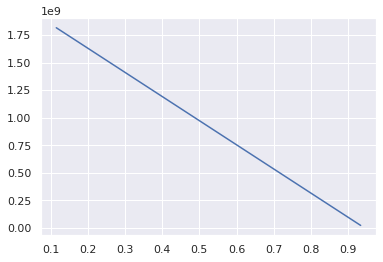

In [19]:
#Student THREE Querry 2
# select the _c65 column and calculates the total sum of _c3 as Flow_Duration_sum.
# use PERCENT_RANK() window function to calculate the percentile rank of each row 
# order in descending order.

result3 = spark.sql("SELECT my_table._c65 AS Label, SUM(my_table._c3) AS Flow_Duration_sum, PERCENT_RANK() OVER (ORDER BY SUM(my_table._c3) DESC) AS percent_rank FROM my_table GROUP BY Label ORDER BY Label DESC")

# display the result
result3.show()

result3 = result3.toPandas()
result3 = result3.head(3)
plt.plot(result3['percent_rank'], result3['Flow_Duration_sum'])
plt.show()


In [20]:
#Student FOUR Querry 1
# select the _c6 column and calculates the count of each unique value in that column as count_c6.
#  group the resulting data by the unique values in the _c6 column using the GROUP BY clause
#  and then sorts the data in descending order based on the count_c6 column. 

result4 = spark.sql("SELECT _c6, COUNT(_c6) AS count_c6 FROM my_table GROUP BY _c6 ORDER BY count_c6 DESC LIMIT 10")

# display the result
result4.show()

+----+--------+
| _c6|count_c6|
+----+--------+
|   0|  455846|
|1912|   30519|
|1928|   30093|
|1138|   24981|
|1148|   24772|
| 161|   21230|
|  97|   20958|
|  31|   17349|
|1944|   16465|
|  77|   14679|
+----+--------+



+-----+-------------------+---------+--------------------+
|Label|Total_Flow_Duration|Num_Flows|   Avg_Flow_Duration|
+-----+-------------------+---------+--------------------+
|   14|   8.46646294654E11|     8785| 9.637408021104155E7|
|   15|   5.11130332273E11|     5620| 9.094845769982207E7|
|   16|   4.60722590395E11|     4697| 9.808869286672343E7|
|   17|   3.85534952396E11|     3777|1.0207438506645486E8|
|    7|   3.04331835866E11|    75537|   4028910.810146021|
|   18|   2.91429897621E11|     2816|1.0349073068927556E8|
|   13|     2.878266521E11|     4455|6.4607553782267116E7|
|   12|   2.72119592912E11|     4383| 6.208523680401552E7|
|   19|   2.62936252806E11|     2584|1.0175551579179567E8|
|   20|   2.20478506803E11|    32243|   6838027.069534472|
|    4|   1.82044406675E11|    53977|  3372629.2064212533|
|   21|   1.63595417151E11|     6601|2.4783429351764884E7|
|   11|   1.62525178167E11|     4978| 3.264868986882282E7|
|    1|   1.45164091212E11|   515372|  281668.5640896284

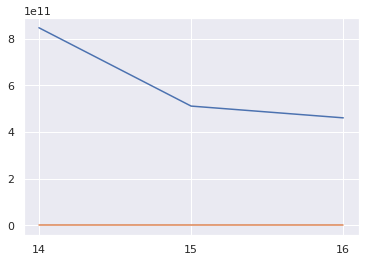

In [21]:
#Student FOUR Querry 2
# calculate the total flow duration, number of flows, and average flow duration for each unique value of the _c65 (Label) column in the my_table dataframe
result4 = spark.sql("SELECT my_table._c65 AS Label, SUM(my_table._c3) as Total_Flow_Duration, COUNT(*) as Num_Flows, AVG(my_table._c3) as Avg_Flow_Duration FROM my_table GROUP BY Label ORDER BY Total_Flow_Duration DESC")

# display the result
result4.show()

# Plot Graph

result4 = result4.toPandas()
result4 = result4.head(3)
plt.plot(result4['Label'], result4['Total_Flow_Duration'], result4['Num_Flows'])
plt.show()

# Task 2 - Part1: PySpark [45 marks]

In [32]:
## Student 1
# Analytical method 1: Calculate mean and standard deviation of a column
from pyspark.sql.functions import mean, stddev
df.select(mean('TotLen Fwd Pkts'), stddev('TotLen Fwd Pkts')).show()
import pyspark.sql.functions as f


+--------------------+----------------------------+
|avg(TotLen Fwd Pkts)|stddev_samp(TotLen Fwd Pkts)|
+--------------------+----------------------------+
|  447.99364280094414|          15735.414790849307|
+--------------------+----------------------------+



+------------------------+
|var_pop(TotLen Fwd Pkts)|
+------------------------+
|     2.476030425069664E8|
+------------------------+



+------------------------+
|var_pop(Fwd Pkt Len Max)|
+------------------------+
|       82754.69795940533|
+------------------------+



+---------------------+
|var_pop(Tot Bwd Pkts)|
+---------------------+
|   10997.324778550945|
+---------------------+



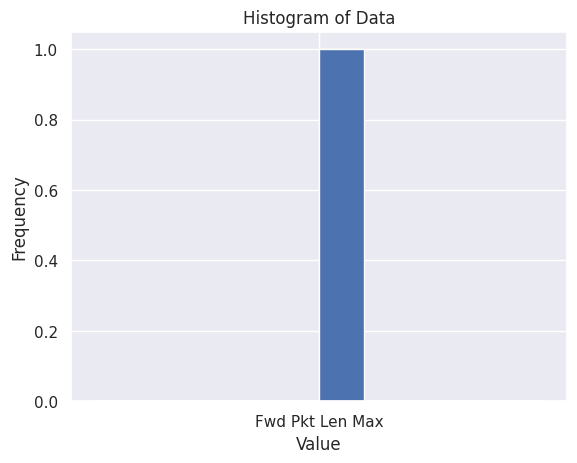

In [33]:
## Student 1
# Analytical method 2: Get the variance of each feature

df.select(f.var_pop("TotLen Fwd Pkts")).show()
df.select(f.var_pop("Fwd Pkt Len Max")).show()
df.select(f.var_pop("Tot Bwd Pkts")).show()

import matplotlib.pyplot as plt

# Plot a histogram of the data
plt.hist("Fwd Pkt Len Max", bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()


+-----------------------------------+
|corr(TotLen Fwd Pkts, Tot Bwd Pkts)|
+-----------------------------------+
|                0.06120321235795348|
+-----------------------------------+



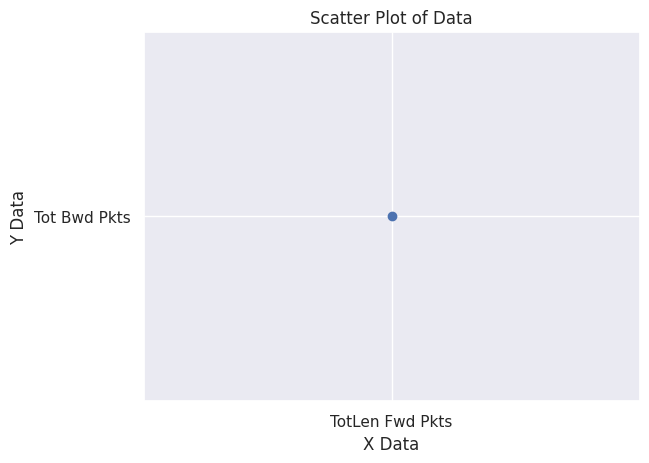

In [34]:
## Student 1
# Analytical method 3:  Calculate correlation between two columns

from pyspark.sql.functions import corr
df.select(corr('TotLen Fwd Pkts', 'Tot Bwd Pkts')).show()

# Plot a scatter plot of the data
plt.scatter("TotLen Fwd Pkts", "Tot Bwd Pkts")
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Scatter Plot of Data')
plt.show()

In [28]:
## Student 2
# Analytical method 1: Get correlation

# Import the necessary functions and libraries
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation



# Select the necessary columns and cast them to float data type
selected_columns = ["Tot Fwd Pkts", "Tot Bwd Pkts", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Label"]
LR_data = df.select(*(f.col(col).cast("float").alias(col) for col in selected_columns))

# Create a string indexer to encode the target variable
indexer = StringIndexer(inputCol="Label", outputCol="label")
indexed = indexer.fit(LR_data).transform(LR_data)

# Create a vector assembler to combine the feature columns into a single vector column
assembler = VectorAssembler(inputCols=["Tot Fwd Pkts", "Tot Bwd Pkts", "TotLen Fwd Pkts", "TotLen Bwd Pkts"],
                            outputCol="features")
output2 = assembler.transform(indexed)

# Calculate the correlation matrix using Pearson and Spearman methods
pearson_corr = Correlation.corr(output2, "features").head()[0]
spearman_corr = Correlation.corr(output2, "features", "spearman").head()[0]

# Print the correlation matrices
print("Pearson correlation matrix:\n" + str(pearson_corr))
print("Spearman correlation matrix:\n" + str(spearman_corr))


23/03/05 01:34:35 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/03/05 01:34:35 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/03/05 01:34:35 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


23/03/05 01:35:40 WARN Executor: Managed memory leak detected; size = 87197758 bytes, task 0.0 in stage 45.0 (TID 83)


23/03/05 01:35:59 WARN Executor: Managed memory leak detected; size = 87197758 bytes, task 0.0 in stage 51.0 (TID 88)


Pearson correlation matrix:
DenseMatrix([[1.        , 0.88443472, 0.05929343, 0.87612018],
             [0.88443472, 1.        , 0.06120321, 0.99683043],
             [0.05929343, 0.06120321, 1.        , 0.01238939],
             [0.87612018, 0.99683043, 0.01238939, 1.        ]])
Spearman correlation matrix:
DenseMatrix([[1.        , 0.66143616, 0.78039812, 0.72290872],
             [0.66143616, 1.        , 0.81857765, 0.86919709],
             [0.78039812, 0.81857765, 1.        , 0.93890483],
             [0.72290872, 0.86919709, 0.93890483, 1.        ]])


In [42]:
## Student 2
# Analytical method 2:Calculating the kurtosis of a column 
from pyspark.sql.functions import kurtosis
df.select(kurtosis("Flow Duration") , kurtosis("Dst Port")).show()

+-----------------------+------------------+
|kurtosis(Flow Duration)|kurtosis(Dst Port)|
+-----------------------+------------------+
|     383063.25407183444| 6.979638405978374|
+-----------------------+------------------+



In [43]:
## Student 2
# Analytical method 3:Calculation of the range

from pyspark.sql.functions import max, min

# Select the maximum and minimum value of the 'Fwd Header Len' column and give them aliases.
max_val = df.select(max('Fwd Header Len').alias('max_value'))
min_val = df.select(min('Fwd Header Len').alias('min_value'))

# Calculate the range by subtracting the minimum value from the maximum value and display the result.
range_val = max_val.crossJoin(min_val).select((max_val.max_value - min_val.min_value).alias('range'))
range_val.show()


+-----+
|range|
+-----+
|996.0|
+-----+



In [44]:
## Student 3
# Analytical method 1: Calculating the skewness of a column in the dataset
from pyspark.sql.functions import skewness
df.select(skewness("Dst Port")).show()

+------------------+
|skewness(Dst Port)|
+------------------+
| 2.967117067332876|
+------------------+



In [45]:
## Student 3
# Analytical method 2: Calculate correlation of two column variables
df.select(f.corr("Flow Duration", "Dst Port")).show()
df.select(f.corr("Dst Port", "Tot Bwd Pkts")).show()
df.select(f.corr("Tot Fwd Pkts", "Dst Port")).show()

+-----------------------------+
|corr(Flow Duration, Dst Port)|
+-----------------------------+
|         -0.00121288872945...|
+-----------------------------+



+----------------------------+
|corr(Dst Port, Tot Bwd Pkts)|
+----------------------------+
|        -0.01905836413916519|
+----------------------------+



+----------------------------+
|corr(Tot Fwd Pkts, Dst Port)|
+----------------------------+
|        -0.02792523567979...|
+----------------------------+



In [46]:
## Student 3
# Analytical method 3: Calculating upper and lower percentile of columns
from pyspark.sql.functions import expr

percentile_cols = ['Tot Fwd Pkts', 'Tot Bwd Pkts', 'Flow Duration']

for col in percentile_cols:
    df.agg(expr(f'percentile(`{col}`, array(0.25, 0.75))').alias(f'{col} percentiles')).show()


+------------------------+
|Tot Fwd Pkts percentiles|
+------------------------+
|              [1.0, 7.0]|
+------------------------+



+------------------------+
|Tot Bwd Pkts percentiles|
+------------------------+
|              [1.0, 6.0]|
+------------------------+



+-------------------------+
|Flow Duration percentiles|
+-------------------------+
|          [7.0, 406669.0]|
+-------------------------+



In [50]:
## Student 4
# Analytical method 1: calculate the mean and standard deviation of the flow duration for each label
from pyspark.sql.functions import stddev, avg

cols = ['Fwd IAT Mean']

for col in cols:
    df.select(stddev(col).alias(f'{col} standard deviation')).show()
    df.select(avg(col).alias(f'{col} average')).show()


+-------------------------------+
|Fwd IAT Mean standard deviation|
+-------------------------------+
|            3.332505192542535E8|
+-------------------------------+



+--------------------+
|Fwd IAT Mean average|
+--------------------+
|   1775582.605887201|
+--------------------+



In [51]:
## Student 4
# Analytical method 2: correlation coefficient with pearson's technique
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

corr_data = df.select(f.col("Fwd IAT Mean").cast("float").alias("TFP"),
                          f.col("Tot Bwd Pkts").cast("float").alias("TBP"))

# Create a features vector
assembler = VectorAssembler(
    inputCols=["TFP", "TBP"],
    outputCol="features")
dataset = assembler.transform(corr_data)

# Calculate Pearson correlation coefficient
pearsonCorr = Correlation.corr(dataset, 'features', 'pearson').collect()[0][0]
print(str(pearsonCorr).replace('nan', 'NaN'))


DenseMatrix([[ 1.00000000e+00, -1.61266183e-04],
             [-1.61266183e-04,  1.00000000e+00]])


In [42]:
## Student 4
# Analytical method 3: Get the standard deviation
df.selectExpr("stddev(`Subflow Fwd Byts`)").show()


+------------------------+
|stddev(Subflow Fwd Byts)|
+------------------------+
|      15735.414790849307|
+------------------------+



# Task 2 - Part2: PySpark [15 marks]

In [24]:
#student 1
import pyspark.sql.functions as f 
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
summary = df.describe().toPandas()
# Print summary statistics
print(summary)

  summary            Dst Port           Protocol            Timestamp  \
0   count             1048575            1048575              1048575   
1    mean   4876.261774312758  8.107557399327659                 None   
2  stddev  14443.436003519171   4.46062464438205                 None   
3     min                   0                  0  05/01/1970 03:01:17   
4     max                9999                  6  14/02/2018 12:59:59   

          Flow Duration        Tot Fwd Pkts        Tot Bwd Pkts  \
0               1048575             1048575             1048575   
1     6255554.608775719   6.206622320768663   7.211191378775958   
2  1.2602911086328785E9  44.478512313301124  104.86818042875132   
3          -11873000000                   1                   0   
4                999998                 993                 992   

      TotLen Fwd Pkts    TotLen Bwd Pkts     Fwd Pkt Len Max  ...  \
0             1048575            1048575             1048575  ...   
1  447.9936428009441

In [26]:
# Random Forest
# Student 1

from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data
data = spark.read.csv("data.csv", header=True, inferSchema=True)

# Filter out rows with missing values
data = data.dropna()

# Map the labels to 0 or 1 (attack or normal)
data = data.withColumn("Label", when(col("Label") == "BENIGN", 0).otherwise(1))

# Select only the required columns
selected_cols = ["Dst Port", "Protocol", "Tot Fwd Pkts", "Tot Bwd Pkts", "Pkt Len Mean"]
data = data.select(selected_cols + ["Label"])
data.show()

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=selected_cols, outputCol="features")
data = assembler.transform(data)

# Split the data into training and testing sets
(training_data, testing_data) = data.randomSplit([0.7, 0.3], seed=42)

# Train the decision tree classifier
dt = DecisionTreeClassifier(labelCol="Label", featuresCol="features", maxDepth=5)
dt_model = dt.fit(training_data)

# Make predictions on the testing data
predictions = dt_model.transform(testing_data)

# Evaluate the model using the accuracy metric
evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")

+--------+--------+------------+------------+--------------+-----+
|Dst Port|Protocol|Tot Fwd Pkts|Tot Bwd Pkts|  Pkt Len Mean|Label|
+--------+--------+------------+------------+--------------+-----+
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|      22|       6|          15|          10|135.0769230769|    1|
|      22|       6|          14|          11|128.9230769231|    1|
|      22|       6|          16|          12|121.1034482759|    1|
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|      80|       6|           5|           3| 74.8888888889|    1|
|      80|       6|           5|           3| 76.8888888889|    1|
|      80|       6|           5|           3| 76.8888888889|    1|
|      80|       6|           5|           3| 74.4444444444|  

Accuracy: 1.0


+--------+--------+------------+------------+--------------+-----+
|Dst Port|Protocol|Tot Fwd Pkts|Tot Bwd Pkts|  Pkt Len Mean|Label|
+--------+--------+------------+------------+--------------+-----+
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|      22|       6|          15|          10|135.0769230769|    1|
|      22|       6|          14|          11|128.9230769231|    1|
|      22|       6|          16|          12|121.1034482759|    1|
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|      80|       6|           5|           3| 74.8888888889|    1|
|      80|       6|           5|           3| 76.8888888889|    1|
|      80|       6|           5|           3| 76.8888888889|    1|
|      80|       6|           5|           3| 74.4444444444|  

23/03/03 13:26:43 WARN Instrumentation: [b5f1fb82] All labels are the same value and fitIntercept=true, so the coefficients will be zeros. Training is not needed.


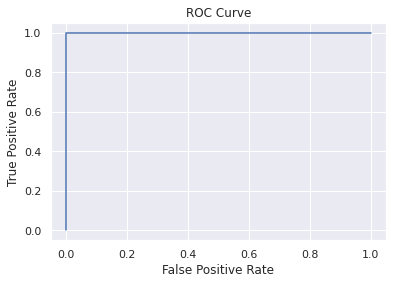

AUC: 1.0


In [27]:
# Student 2
# Logistics Regression

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.tuning import CrossValidatorModel
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt

# Load the data
data = spark.read.csv("data.csv", header=True, inferSchema=True)

# Filter out rows with missing values
data = data.dropna()

# Map the labels to 0 or 1 (attack or normal)
data = data.withColumn("Label", when(col("Label") == "BENIGN", 0).otherwise(1))

# Select only the required columns
selected_cols = ["Dst Port", "Protocol", "Tot Fwd Pkts", "Tot Bwd Pkts", "Pkt Len Mean"]
data = data.select(selected_cols + ["Label"])
data.show()

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=selected_cols, outputCol="features")
data = assembler.transform(data)

# Split the data into training and testing sets
(training_data, testing_data) = data.randomSplit([0.7, 0.3], seed=42)

# Train the logistic regression model
lr = LogisticRegression(labelCol="Label", featuresCol="features", maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(training_data)

# Make predictions on the testing data
predictions = lr_model.transform(testing_data)

# Evaluate the model using the binary classification evaluator
evaluator = BinaryClassificationEvaluator(labelCol="Label")

# Calculate ROC curve
roc = lr_model.summary.roc.toPandas()

# Plot ROC curve
plt.plot(roc['FPR'], roc['TPR'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc = evaluator.evaluate(predictions)

print(f"AUC: {auc}")


+--------+--------+------------+------------+--------------+-----+
|Dst Port|Protocol|Tot Fwd Pkts|Tot Bwd Pkts|  Pkt Len Mean|Label|
+--------+--------+------------+------------+--------------+-----+
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|      22|       6|          15|          10|135.0769230769|    1|
|      22|       6|          14|          11|128.9230769231|    1|
|      22|       6|          16|          12|121.1034482759|    1|
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|      80|       6|           5|           3| 74.8888888889|    1|
|      80|       6|           5|           3| 76.8888888889|    1|
|      80|       6|           5|           3| 76.8888888889|    1|
|      80|       6|           5|           3| 74.4444444444|  

23/03/03 13:31:24 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/03/03 13:31:24 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/03/03 13:31:24 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


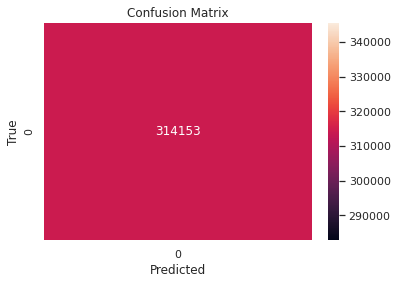

AUC: 1.0


In [28]:
# Student 3 
# GBT CLASSIFIER
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the data
data = spark.read.csv("data.csv", header=True, inferSchema=True)

# Filter out rows with missing values
data = data.dropna()

# Map the labels to 0 or 1 (attack or normal)
data = data.withColumn("Label", when(col("Label") == "BENIGN", 0).otherwise(1))

# Select only the required columns
selected_cols = ["Dst Port", "Protocol", "Tot Fwd Pkts", "Tot Bwd Pkts", "Pkt Len Mean"]
data = data.select(selected_cols + ["Label"])
data.show()

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=selected_cols, outputCol="features")
data = assembler.transform(data)

# Split the data into training and testing sets
(training_data, testing_data) = data.randomSplit([0.7, 0.3], seed=42)

# Train the GBT classifier model
gbt = GBTClassifier(labelCol="Label", featuresCol="features", maxIter=50, subsamplingRate=0.8, featureSubsetStrategy="sqrt")
gbt_model = gbt.fit(training_data)

# Make predictions on the testing data
predictions = gbt_model.transform(testing_data)

# Evaluate the model using the binary classification evaluator
evaluator = BinaryClassificationEvaluator(labelCol="Label")

# Convert predicted labels and true labels to numpy arrays
y_pred = np.array(predictions.select("prediction").collect())
y_true = np.array(predictions.select("Label").collect())

# Assuming you have true labels y_true and predicted labels y_pred
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate AUC
auc = evaluator.evaluate(predictions)

print(f"AUC: {auc}")



+--------+--------+------------+------------+--------------+-----+
|Dst Port|Protocol|Tot Fwd Pkts|Tot Bwd Pkts|  Pkt Len Mean|Label|
+--------+--------+------------+------------+--------------+-----+
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|      22|       6|          15|          10|135.0769230769|    1|
|      22|       6|          14|          11|128.9230769231|    1|
|      22|       6|          16|          12|121.1034482759|    1|
|       0|       0|           3|           0|           0.0|    1|
|       0|       0|           3|           0|           0.0|    1|
|      80|       6|           5|           3| 74.8888888889|    1|
|      80|       6|           5|           3| 76.8888888889|    1|
|      80|       6|           5|           3| 76.8888888889|    1|
|      80|       6|           5|           3| 74.4444444444|  

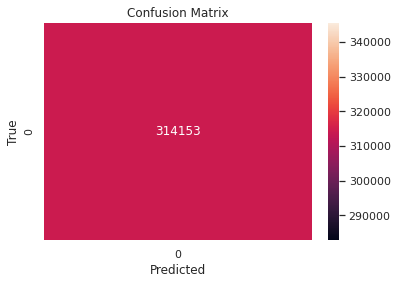

AUC: 1.0


In [29]:
#student 4
# Support Vector Machines Classifier

from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.tuning import CrossValidatorModel
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt

# Load the data
data = spark.read.csv("data.csv", header=True, inferSchema=True)

# Filter out rows with missing values
data = data.dropna()

# Map the labels to 0 or 1 (attack or normal)
data = data.withColumn("Label", when(col("Label") == "BENIGN", 0).otherwise(1))

# Select only the required columns
selected_cols = ["Dst Port", "Protocol", "Tot Fwd Pkts", "Tot Bwd Pkts", "Pkt Len Mean"]
data = data.select(selected_cols + ["Label"])
data.show()

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=selected_cols, outputCol="features")
data = assembler.transform(data)

# Split the data into training and testing sets
(training_data, testing_data) = data.randomSplit([0.7, 0.3], seed=42)

# Train the SVM model
svm = LinearSVC(labelCol="Label", featuresCol="features", maxIter=10, regParam=0.1, tol=1e-6)
svm_model = svm.fit(training_data)

# Make predictions on the testing data
predictions = svm_model.transform(testing_data)

# Evaluate the model using the binary classification evaluator
evaluator = BinaryClassificationEvaluator(labelCol="Label")

# Convert predicted labels and true labels to numpy arrays
y_pred = np.array(predictions.select("prediction").collect())
y_true = np.array(predictions.select("Label").collect())

# Assuming you have true labels y_true and predicted labels y_pred
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate AUC
auc = evaluator.evaluate(predictions)

print(f"AUC: {auc}")
